<a href="https://colab.research.google.com/github/AugustinCablant/Viager/blob/main/comparaison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install unidecode
!pip install dateparser
import pandas as pd
import numpy as np
import dateparser
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Stage')
import matplotlib.pyplot as plt
import re
import seaborn as sns
from dateutil import parser
from datetime import datetime
from unidecode import unidecode

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

# Comparaison des bases de données matchées

In [ ]:
# Ouverture de la mienne
df_augustin = pd.read_csv('matching_fin.csv')

# ouverture de celle de Mr Linnemer
df_laurent = pd.read_stata('merge final/Matched12.dta')

<ipython-input-46-2e7b8726c638>:5: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_laurent = pd.read_stata('merge final/Matched12.dta')


In [ ]:
# liste des noms dans df_augustin
liste_nom_augustin = df_augustin['B_nom'].to_list()

# liste des noms dans df_augustin
liste_prenoms_augustin = df_augustin['B_prenoms'].to_list()

# compter combien de lignes en commun
compteur = 0
# récupérer les lignes différentes du df_laurent
recup = []

for i in df_laurent.index.to_list():
  if df_laurent['b_nom'][i] in liste_nom_augustin:
    if df_laurent['b_prenoms'][i] in liste_prenoms_augustin:
      compteur += 1
  else:
    recup.append(i)

print('Il y a ',compteur,' lignes en commun')
print('Il y a ',len(recup),' lignes différentes')
#df_laurent[df_laurent.index.isin(recup)][['a_nom','b_nom','a_prenom','b_prenoms']].to_csv('merge final/31.csv')

Il y a  949  lignes en commun
Il y a  31  lignes différentes


In [ ]:
# liste des noms dans df_laurent
liste_nom_laurent = df_laurent['b_nom'].to_list()

# liste des noms dans df_laurent
liste_prenoms_laurent = df_laurent['b_prenoms'].to_list()

# compter combien de lignes en commun
compteur = 0
# récupérer les lignes différentes du df_laurent
recup = []

for i in df_augustin.index.to_list():
  if df_augustin['B_nom'][i] in liste_nom_laurent:
    if df_augustin['B_prenoms'][i] in liste_prenoms_laurent:
      compteur += 1
  else:
    recup.append(i)

print('Il y a ',compteur,' lignes en commun')
print('Il y a ',len(recup),' lignes différentes')
df_augustin[df_augustin.index.isin(recup)][['A_nom','B_nom','A_prenoms','B_prenoms']].to_csv('merge final/59.csv')

Il y a  946  lignes en commun
Il y a  59  lignes différentes


# Individus à conserver chez Augustin

In [ ]:
garder = df_augustin[df_augustin.index.isin(recup)]

In [ ]:
garder[['A_nom','B_nom','A_prenoms','B_prenoms','A_ville','B_ville']][50:70]

,A_nom,B_nom,A_prenoms,B_prenoms,A_ville,B_ville
997,DELAPIERRE,DELAPIERRE,ADRIEN MARCEL,ADRIEN MARCEL,NaN,PARIS 3
998,DUGROSPREZ,DUGROSPREZ,LILIANE,LILIANE MICHELINE ANDREE,Alforvill,ALFORTVILLE
999,DUMENOIT,DUMENOIT,PIERRE JEAN LOUIS,PIERRE JEAN LOUIS,NaN,SAINT-DENIS
1000,GAUTSCH,GAUTSCH,FRANCOISE ANNETTE MARIE MATHILDE,FRANCOISE ANNETTE MARIE MATHILDE,Constantine,DEPARTEMENT DE CONSTANTINE
1002,KERVAIRE,KERVAIRE,HENRI FERNAND,HENRI FERNAND,NaN,LIFFOL-LE-GRAND
1004,MARCHAL,MALBE,MARCELLE,JEAN FERNAND,Incheville,SAUZE-VOSSAIS
1005,PARISIEN,PARISIEN,GENEVIEVE ALICE,GENEVIEVE ALICE,NaN,PARIS 10E ARRONDISSEMENT
1006,PARMELAND,PARMELAND,ARLETTE PAULINE,ARLETTE PAULINE MARIA,NaN,BRY-SUR-MARNE
1010,AUBERT,AUBERT,NICOLLE,NICOLLE,NaN,NEUVES-MAISONS


In [ ]:
#garder = garder.drop([876,780,750,726,703,658,642,640,576,540,478,426,416,185,155,86,1004])

#garder.to_csv('merge final/garder.csv')
#garder[['A_nom','B_nom','A_prenoms','B_prenoms']].to_csv('merge final/garder_liste.csv')

# Rajouter les individus au Df_laurent

In [ ]:
notyet = pd.read_stata('merge final/NotYet12.dta')
garder = pd.read_csv('merge final/garder.csv')

In [ ]:
# créer le Data frame avec les colonnes de Mr Linnemer

correspondance = {'A_nom' : 'a_nom', 'A_prenoms' : 'a_prenom', 'A_annee' : 'a_annee', 'A_mois': 'a_mois', 'A_jour': 'a_jour',
       'A_departement' : 'a_dep' , 'A_ville' : 'a_ville', 'A_sexe' : 'a_sexe', 'B_nom' : 'b_nom', 'B_prenoms':'b_prenoms',
       'B_annee':'b_annee', 'B_mois':'b_mois', 'B_jour':'b_jour', 'D_annee':'d_annee', 'D_mois':'d_mois', 'D_jour':'d_jour',
       'B_departement':'b_dep', 'B_pays':'b_pays', 'B_ville':'b_ville', 'B_sexe':'b_sexe', 'codebirth':'bcode', 'fichier' : 'fichier'}

# Utiliser la méthode rename() pour remplacer les noms des colonnes
add = garder.rename(columns=correspondance)
add['matched'] = 'augustin'
add = add[['a_nom', 'a_prenom', 'a_annee', 'a_mois', 'a_jour',
       'a_dep', 'A_abroad', 'a_ville', 'a_sexe', 'b_nom', 'b_prenoms',
       'b_annee', 'b_mois', 'b_jour', 'd_annee', 'd_mois', 'd_jour', 'b_dep',
       'b_pays', 'b_ville', 'b_sexe', 'bcode','fichier','matched']]


In [ ]:
notyet['a_nom'] = notyet['a_nom'].str.upper()
notyet['a_prenom'] = notyet['a_prenom'].str.upper()
df = pd.merge(add , notyet, on = ['a_prenom', 'a_nom'], how = 'left')

In [ ]:
nv = df[pd.notnull(df['id'])]
nv = nv[['a_nom', 'a_prenom', 'a_annee_x', 'a_mois_x', 'a_jour_x', 'a_dep_x',
       'A_abroad', 'a_ville_x', 'a_sexe_x', 'b_nom', 'b_prenoms', 'b_annee',
       'b_mois', 'b_jour', 'd_annee', 'd_mois', 'd_jour', 'b_dep', 'b_pays',
       'b_ville', 'b_sexe', 'bcode', 'fichier', 'matched', 'annee','id']]
nv = nv.rename(columns = {'a_annee_x' : 'a_annee', 'a_mois_x':'a_mois', 'a_jour_x':'a_jour', 'a_dep_x':'a_dep',
       'A_abroad':'a_abroad', 'a_ville_x':'a_ville', 'a_sexe_x':'a_sexe'})
nv.to_csv('merge final/ajouter.csv')

In [ ]:
liste_id = nv['id'].to_list()
notyet_bis = notyet[~ notyet['id'].isin(liste_id)]
notyet_bis.to_csv('merge final/notyet_bis.csv')

In [ ]:
df_final = df_laurent.append(nv)

<ipython-input-77-9eb7ffe1ac3b>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_laurent.append(nv)


In [ ]:
df_final= df_final[['b_nom',
       'b_prenoms', 'b_annee', 'b_mois', 'b_jour', 'b_dep','b_sexe', 'd_annee',
       'd_mois', 'd_jour', 'd_dep', 'bcode', 'b_ville', 'b_pays', 'dcode', 'acte', 'fichier', 'annee', 'a_prenom', 'a_nom',
       'a_sexe', 'a_jour', 'a_mois', 'a_annee', 'a_dep', 'a_ville', 'id', 'm2',
       'matched', 'a_abroad']]

In [ ]:
df_final.to_csv('merge final/matching_final.csv')

In [ ]:
df_final[df_final['a_sexe']!=df_final['b_sexe']][['a_nom','b_nom','a_prenom','b_prenoms','a_sexe','b_sexe']]

,a_nom,b_nom,a_prenom,b_prenoms,a_sexe,b_sexe
3,Adam,ADAM,Etienne,ETIENNE JACQUES MARIE,2.0,1.0
4,Adania,ADANIA,Sofia,SOFIA,1.0,2.0
31,Augsburger,AUGSBURGER,Andree Marthe,ANDREE MARTHE,1.0,2.0
39,Bailly,BAILLY,Jean,JEAN ROBERT,2.0,1.0
62,Baudinat,BAUDINAT,Alphonse,ALPHONSE,2.0,1.0
235,Creusot,CREUSOT,Suzanne,SUZANNE,2.0,1.0


In [ ]:
df_final.to_csv('matching_final.csv')

In [ ]:
# modifications sur les sexes
"""
df_final['a_sexe'][2] = float(2)
df_final['a_sexe'][750] = float(2)
df_final['a_sexe'][626] = float(2)
df_final['a_sexe'][31] = float(1)
df_final['a_sexe'][15] = float(1)
df_final['a_sexe'][4] = float(1)
df_final['a_sexe'][483] = float(1)
df_final['a_sexe'][371] = float(1)
df_final['b_sexe'][251] = float(2)
df_final['a_sexe'][39] = float(2)
df_final['a_sexe'][33] = float(2)
df_final['a_sexe'][32] = float(2)
df_final['a_sexe'][26] = float(2)
df_final['a_sexe'][19] = float(2)
df_final['a_sexe'][9] = float(2)
df_final['a_sexe'][3] = float(2)
df_final['a_sexe'][41] = float(2)
df_final['a_sexe'][3] = float(1)
df_final['a_sexe'][4] = float(2)
df_final['a_sexe'][31] = float(2)
df_final['a_sexe'][39] = float(1)
df_final['a_sexe'][62] = float(1)
df_final['b_sexe'][235] = float(2)
"""

## STATA

replace a_sexe = 2.0 if b_prenom == "NICOLLE" & b_nom == "AUBERT"
replace a_sexe = 1.0 if b_prenom == "Alphonse" & b_nom == "Baudinat"
replace b_sexe = 2.0 if b_prenom == "SUZANNE" & b_nom == "CREUSOT"
replace b_sexe = 2.0 if b_prenom == "MARIE LOUISE" & b_nom == "DAVID"
replace a_sexe = 1.0 if b_prenom == "JOSEPH" & b_nom == "FURSAY"
replace a_sexe = 1.0 if b_prenom == "RENE EMILE" & b_nom == "HOSXE"
replace a_sexe = 2.0 if b_prenom == "MARTHE ADRIENNE" & b_nom == "MARECHAL"
replace a_sexe = 2.0 if b_prenom == "JEANNINE AMELIE" & b_nom == "PERSONNE"
replace a_sexe = 2.0 if b_prenom == "GINETTE" & b_nom == "RICHART"
replace a_sexe = 2.0 if b_prenom == "IRMA LEONTINE" & b_nom == "BEAUBERT"
replace a_sexe = 1.0 if b_prenom == "FERNAND ALPHONSE MARIE" & b_nom == "BEAUMIER"
replace a_sexe = 2.0 if b_prenom == "ANDREE" & b_nom == "COUTOR"
replace a_sexe = 1.0 if b_prenom == "ANDRE LOUIS JOSEPH" & b_nom == "GAVARD-BOITIER"
replace a_sexe = 2.0 if b_prenom == "YVONNE MADELEINE" & b_nom == "LABOUREAU"
replace a_sexe = 2.0 if b_prenom == "SUZANNE AMELIE" & b_nom == "ROUCHEUX"
replace a_sexe = 1.0 if b_prenom == "JACQUES ALAIN" & b_nom == "BIRVAR"
replace a_sexe = 2.0 if b_prenom == "YVONNE JEANNE" & b_nom == "BIRVAR"
replace a_sexe = 2.0 if b_prenom == "VICTORINE EXILDA" & b_nom == "CHATAIN"
replace a_sexe = 2.0 if b_prenom == "GENEVIEVE ALICE" & b_nom == "PARISIEN"
replace a_sexe = 2.0 if b_prenom == "NICOLLE" & b_nom == "AUBERT"

In [ ]:
from datetime import datetime

# création de la variable Td
df = pd.read_csv('matching_final.csv')
df['b_jour'][250] = 4
df['b_jour'][271] = 19
df['b_jour'][368] = 30
df['b_jour'][504] = 24
df['b_jour'][675] = 2
df['b_jour'][778] = 20
df['Td'] = np.nan
df['b_annee'] = df['b_annee'].astype(int)
df['d_annee'] = df['d_annee'].astype(int)
df['b_jour'] = df['b_jour'].astype(int)
df['d_jour'] = df['d_jour'].astype(int)
df['b_mois'] = df['b_mois'].astype(int)
df['d_mois'] = df['d_mois'].astype(int)

def convert_to_datetime(row):
    try:
        year = int(row['b_annee'])
        month = int(row['b_mois'])
        day = int(row['b_jour'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT

df['date_naissance'] = df.apply(convert_to_datetime, axis=1)

def convert_to_datetime(row):
    try:
        year = int(row['d_annee'])
        month = int(row['d_mois'])
        day = int(row['d_jour'])
        return pd.Timestamp(year=year, month=month, day=day)
    except ValueError:
        return pd.NaT

df['date_deces'] = df.apply(convert_to_datetime, axis=1)

df['Td'] = (df['date_deces'] - df['date_naissance']).dt.days

df['Td']

<ipython-input-203-2fc4da5d38e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b_jour'][250] = 4
<ipython-input-203-2fc4da5d38e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b_jour'][271] = 19
<ipython-input-203-2fc4da5d38e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b_jour'][368] = 30
<ipython-input-203-2fc4da5d38e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

0       31235.0
1       28235.0
2       28235.0
3       34150.0
4       32221.0
         ...   
1020    32914.0
1021    30487.0
1022    33554.0
1023    32174.0
1024    31443.0
Name: Td, Length: 1025, dtype: float64

In [ ]:
df = df[['b_nom', 'b_prenoms', 'b_annee', 'b_mois', 'b_jour',
       'b_dep', 'b_sexe', 'd_annee', 'd_mois', 'd_jour', 'd_dep', 'bcode',
       'b_ville', 'b_pays', 'dcode', 'acte', 'fichier', 'annee', 'a_prenom',
       'a_nom', 'a_sexe', 'a_jour', 'a_mois', 'a_annee', 'a_dep', 'a_ville',
       'id', 'm2', 'matched', 'a_abroad', 'Td', 'date_naissance',
       'date_deces']]
df.to_csv('matching_final.csv')

In [ ]:
df['b_jour'][250] = 4
df['b_jour'][271] = 19
df['b_jour'][368] = 30
df['b_jour'][504] = 24
df['b_jour'][675] = 2
df['b_jour'][778] = 20

<ipython-input-190-d1257bcec203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b_jour'][250] = 4
<ipython-input-190-d1257bcec203>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b_jour'][271] = 19
<ipython-input-190-d1257bcec203>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['b_jour'][368] = 30
<ipython-input-190-d1257bcec203>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

# Description base de données

In [ ]:
df = pd.read_csv('matching_final.csv')
hommes = df[df['b_sexe']==float(1)]
femmes = df[df['b_sexe']==float(2)]

In [ ]:
df['annee'].describe()

count    1025.000000
mean     1990.742439
std         7.183423
min      1977.000000
25%      1986.000000
50%      1989.000000
75%      1995.000000
max      2009.000000
Name: annee, dtype: float64

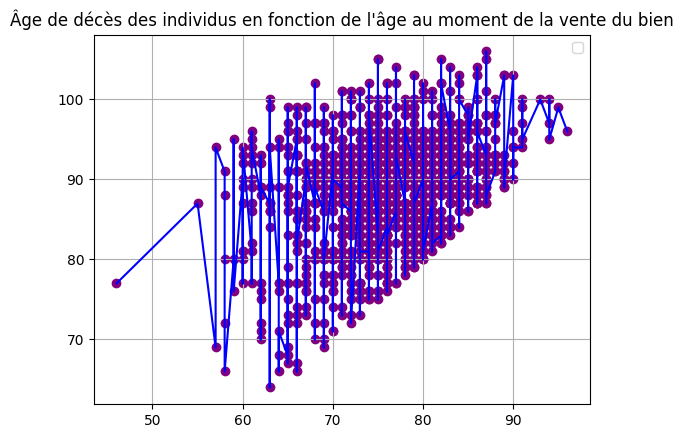

In [ ]:

df_bis = df.sort_values(by = 'age_acte')
df_bis = df_bis.drop(995)
plt.plot(df_bis['age_acte'],df_bis['age_mort'], color = 'blue')
plt.scatter(df_bis['age_acte'],df_bis['age_mort'], color = 'purple' )

#plt.scatter(df_bis['age_mort'],df_bis['ecart'], color = 'black', label = 'ecart normalisé')
#plt.scatter(df_bis['age_mort'], df_bis['age_acte'], color = 'red', label = 'age acte normalisé')
#plt.scatter(df_bis['age_acte'], df_bis['ecart'], color = 'orange', label = 'données normalisées')
#plt.hist(df['age_acte'])
plt.legend()
plt.grid()
plt.title("Âge de décès des individus en fonction de l'âge au moment de la vente du bien")
#plt.xlabel("Âge de décès")
#plt.ylabel("Nombre d'années séparant l'acte de vente et le décès de l'individu")
plt.show()

In [ ]:
df_bis[df_bis['b_annee']==float(1980)][['a_nom','b_nom','a_prenom','b_prenoms', 'a_annee','b_annee','a_mois','b_mois','a_jour','b_jour','a_ville','b_ville']]

,a_nom,b_nom,a_prenom,b_prenoms,a_annee,b_annee,a_mois,b_mois,a_jour,b_jour,a_ville,b_ville
995,DESONAY,DESONAY,MICHEL,MICHEL FLORENT,1930.0,1980.0,1.0,1.0,24.0,24.0,Olne,OLNF


In [ ]:
df['ecart'] = df['d_annee']-df['annee']
df['age_mort'] = df['d_annee']-df['b_annee']
df['age_acte'] = df['annee']-df['b_annee']
df['age_acte'].describe()

count    1025.000000
mean       75.485854
std         7.423703
min        17.000000
25%        71.000000
50%        75.000000
75%        80.000000
max        96.000000
Name: age_acte, dtype: float64